In [2]:
# 2: given the time period, which company has the most growth on stock price (bar chart?)
# 3: spread of manager's age (box plot, info)

In [3]:
# import Dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
top_30_tickers =[
    "PLTR", "TLRY", "TSLA", "LCID", "AAPL", "NIO", 
    "AMD", "AMZN", "RIVN", "F", "BAC", "T",
    "MPW", "NVDA", "AMC", "INTC", "ITUB", "JNJ", 
    "VALE", "SOFI", "MARA", "DDOG", "LYG", "DISH",
    "AAL", "OPEN", "SWN", "PFE", "HPE", "JBLU"
]

In [5]:
top_30_stock_asending = pd.DataFrame()
data = yf.Ticker("AAPL").history(start="2018-01-01", end="2023-06-30")

# Resample the data to a quarterly frequency, taking the last day's data for each quarter
quarterly_data = data.resample('Q').last()

# Sort data in descending order
data_sorted = quarterly_data.sort_index(ascending=True)

top_30_stock_asending["Date"] = data_sorted.index

top_30_stock_asending.set_index("Date", inplace=True)

top_30_stock_asending["AAPL Price"] = data_sorted["Close"]

for ticker in top_30_tickers:
    if ticker != "AAPL":
        data = yf.Ticker(ticker).history(start="2018-01-01", end="2023-06-30")
        quarterly_data = data.resample('Q').last()
        data_sorted = quarterly_data.sort_index(ascending=True)
        top_30_stock_asending[ticker + " Price"] = data_sorted["Close"]

top_30_stock_asending.head()
top_30_stock_asending.to_csv('top_30_stock_asending.csv', index=False)


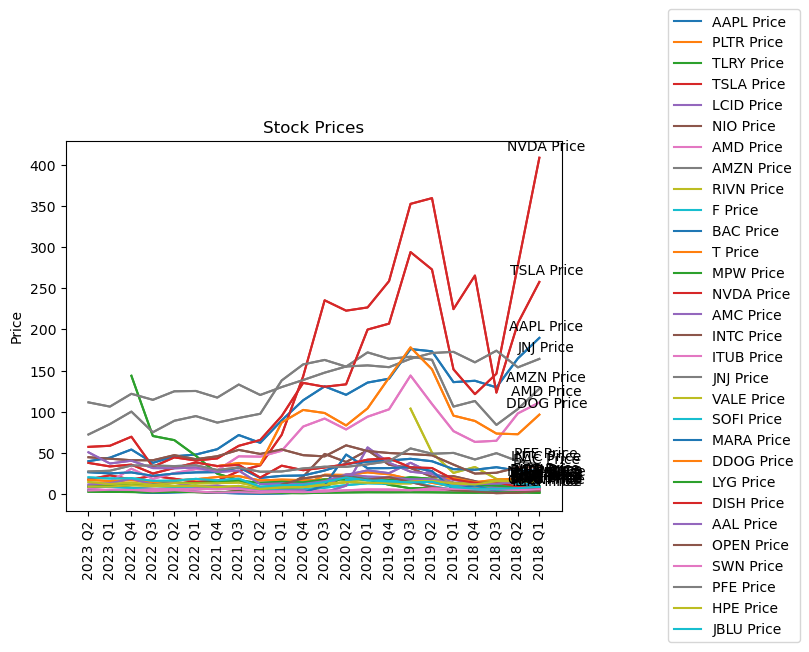

<Figure size 5500x3000 with 0 Axes>

In [6]:
# Read the data
df = pd.read_csv('top_30_stock_asending.csv')

# Assuming that your CSV's first row contains ticker names and the rows below contain prices

for ticker in df.columns:
    plt.plot(df[ticker], label=ticker)

    # Annotate the last point
    y_last = df[ticker].iloc[-1]  # Gets the y-coordinate of the last point
    plt.annotate(ticker, (len(df)-1, y_last), textcoords="offset points", xytext=(5,5), ha='center')

# Define the quarters
quarters = [
    '2023 Q2', '2023 Q1', '2022 Q4', '2022 Q3', '2022 Q2', '2022 Q1', 
    '2021 Q4', '2021 Q3', '2021 Q2', '2021 Q1', '2020 Q4', '2020 Q3', 
    '2020 Q2', '2020 Q1', '2019 Q4', '2019 Q3', '2019 Q2', '2019 Q1', 
    '2018 Q4', '2018 Q3', '2018 Q2', '2018 Q1'
]

# Plot the data
for ticker in df.columns:
    plt.plot(df[ticker])

# Set x-ticks and x-labels
plt.xticks(range(len(quarters)), quarters, rotation=45)

# Add labels, title, and legend
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Stock Prices')
plt.legend(loc='best')
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

plt.figure(figsize=(55, 30))

# Display the plot
plt.show()



In [7]:
# Example tickers
top_30_tickers =[
    "PLTR", "TLRY", "TSLA", "LCID", "AAPL", "NIO", 
    "AMD", "AMZN", "RIVN", "F", "BAC", "T",
    "MPW", "NVDA", "AMC", "INTC", "ITUB", "JNJ", 
    "VALE", "SOFI", "MARA", "DDOG", "LYG", "DISH",
    "AAL", "OPEN", "SWN", "PFE", "HPE", "JBLU"
]

# Lists to store data
company_names = []
officer_ages = []

for ticker in top_30_tickers:
    company_info = yf.Ticker(ticker).info
    
    company_name = company_info.get('longName', ticker)
    company_officers = company_info.get('companyOfficers', [])
    
    current_officer_ages = []

    for officer in company_officers:
        # Check if 'age' key exists for the current officer
        if 'age' in officer:
            current_officer_ages.append(officer['age'])

    # Append the data to our lists
    company_names.append(company_name)
    officer_ages.append(current_officer_ages)

# Convert data to DataFrame
df = pd.DataFrame({
    'Company Name': company_names,
    'Officer Ages': officer_ages
})

print(df)

# Export DataFrame to a CSV file
df.to_csv('officer_ages.csv', index=False)



                          Company Name                          Officer Ages
0           Palantir Technologies Inc.  [55, 55, 38, 37, 39, 39, 39, 38, 73]
1                  Tilray Brands, Inc.                      [64, 52, 56, 49]
2                          Tesla, Inc.                  [50, 41, 44, 43, 46]
3                    Lucid Group, Inc.                      [63, 48, 54, 48]
4                           Apple Inc.                  [61, 59, 58, 58, 55]
5                             NIO Inc.              [48, 49, 41, 58, 52, 53]
6         Advanced Micro Devices, Inc.          [52, 62, 60, 52, 59, 56, 59]
7                     Amazon.com, Inc.          [58, 54, 58, 58, 55, 55, 57]
8              Rivian Automotive, Inc.          [38, 40, 39, 53, 49, 53, 54]
9                   Ford Motor Company  [65, 60, 56, 56, 57, 59, 56, 52, 52]
10         Bank of America Corporation      [63, 53, 55, 62, 57, 50, 50, 48]
11                           AT&T Inc.  [59, 58, 52, 53, 56, 43, 43, 70, 50]

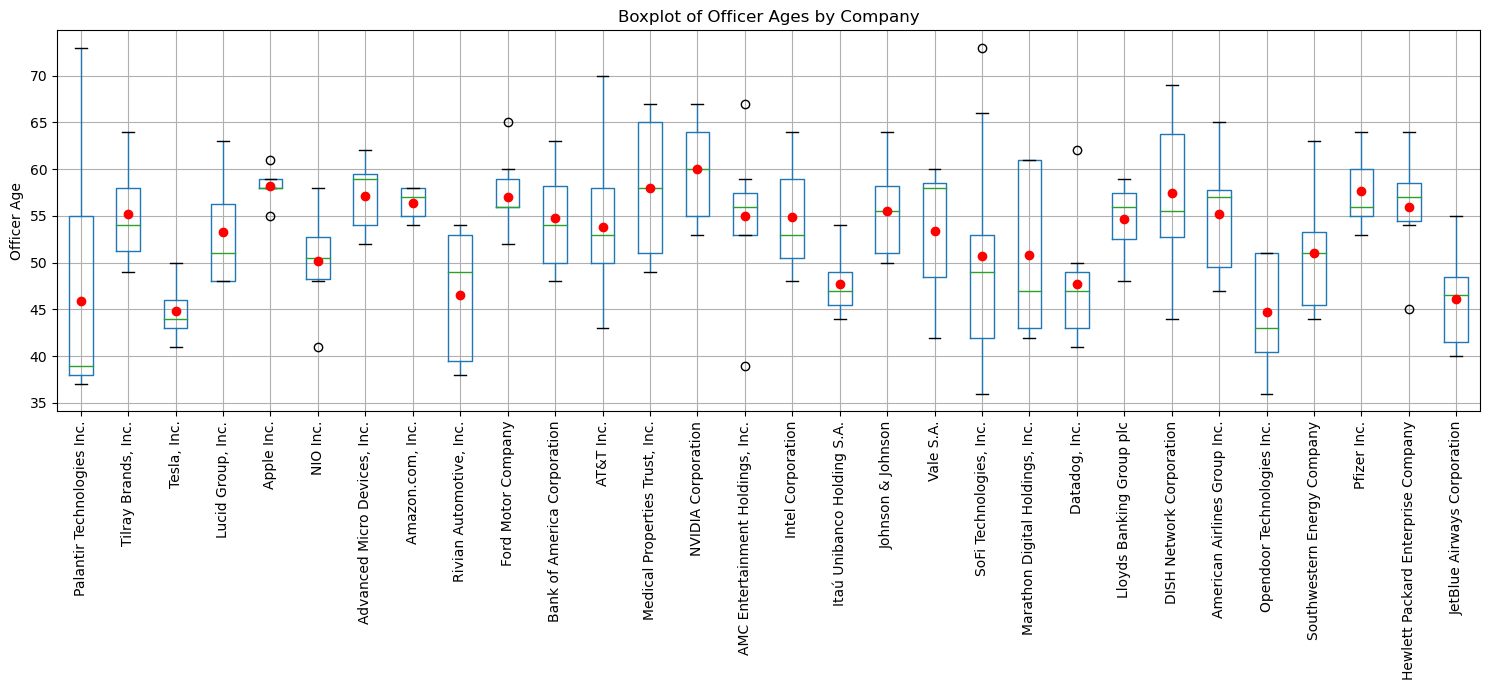

In [8]:
# Dictionary to store data
data_dict = {}

for ticker in top_30_tickers:
    company_info = yf.Ticker(ticker).info
    
    company_name = company_info.get('longName', ticker)
    company_officers = company_info.get('companyOfficers', [])
    
    current_officer_ages = []

    for officer in company_officers:
        # Check if 'age' key exists for the current officer
        if 'age' in officer:
            current_officer_ages.append(officer['age'])

    # Append the data to our dictionary
    data_dict[company_name] = current_officer_ages

# Convert data to DataFrame
df = pd.DataFrame.from_dict(data_dict, orient='index').transpose()

# Plot the data
plt.figure(figsize=(15, 7))
df.boxplot(showmeans=True, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"red"})
plt.xticks(rotation=90)
plt.ylabel('Officer Age')
plt.title('Boxplot of Officer Ages by Company')
plt.tight_layout()
plt.show()
